In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, BasicAer, execute
import matplotlib.pyplot as plt
import numpy as np
from qiskit.quantum_info import process_fidelity
%matplotlib inline

Theta_0 and theta_1 are the small corrections derived analyticaly for an arbitary gaussian distribution. 
Basically we are considering correcting z type errors, we prepare in |+> state, apply our gate (error) and make a single measurement in y basis. Repeat this process for different outocmes of the same distribution. Spectator outcome is basicaly an array of 0's and 1's corresponding to the measurements. If we get 0 on the spectator, we apply correction=exp(theta_0*sz) and if we get 1 we apply correction=exp(theta_1*sz) to the data. 
Then we calculate the process fidelity between error*correction (this is abuse of notation, I just mean the resulting channel we gate by composing the error and our correction) and identity gate. 

In [3]:

def spec1qubit(mu,sigma=0.1,N=1000):
    error = np.random.normal(mu,sigma,N)
    theta_0=-0.5*np.arctan((np.exp(-2*sigma**2)*np.sin(2*mu)-0.5+0.5*np.exp(-8*sigma**2)*np.cos(4*mu))/(np.exp(-2*sigma**2)*np.cos(2*mu)-0.25*np.exp(-8*sigma**2)*np.sin(4**mu)))
    theta_1=-0.5*np.arctan((np.exp(-2*sigma**2)*np.sin(2*mu)-0.5+0.5*np.exp(-8*sigma**2)*np.cos(4*mu))/(np.exp(-2*sigma**2)*np.cos(2*mu)+0.25*np.exp(-8*sigma**2)*np.sin(4*mu)))
    theta_approx=(2/3)*alpha**2
    outcome=np.zeros((N))
    for i in range(N):
        qr=QuantumRegister(1)
        cr=ClassicalRegister(1)
        specQ=QuantumCircuit(qr,cr)
        specQ.h(qr[0])
        specQ.rz(-2*error[i],qr[0])
        specQ.sdg(qr[0])
        specQ.h(qr[0])
        specQ.measure(qr[0],cr[0])
        temp_1=execute(specQ,backend=BasicAer.get_backend('qasm_simulator'),shots=1)
        temp_2=[*temp_1.result().get_counts().keys()]
        temp_3=int(temp_2[0])
        outcome[i]=temp_3
    si=np.array([[1,0],[0,1]])
    sz=np.array([[1,0],[0,-1]])
    def szerror(theta):
        return np.cos(theta)*si+1.j*np.sin(theta)*sz
    processfid=np.zeros((N))
    processfid_nocorrection=np.zeros((N))
    for i in range(N):
        if (outcome[i]==0):
            equiv=np.matmul(szerror(error[i]),szerror(theta_0))
            processfid[i]=process_fidelity(equiv,si)
        elif (outcome[i]==1):
            equiv=np.matmul(szerror(error[i]),szerror(theta_1))
            processfid[i]=process_fidelity(equiv,si)
        processfid_nocorrection[i]=process_fidelity(szerror(error[i]),si)
    return np.mean(processfid), np.mean(processfid_nocorrection)

Run it for fixed sigma but varying mu and plot avg gate fidelity vs mu. 

In [4]:
n=21

alpha=np.linspace(0.01,0.9,n)
processfid_final=np.zeros((len(alpha)))
processfid_final_nocorrection=np.zeros((len(alpha)))
for i in range(n):
    processfid_final[i],processfid_final_nocorrection[i] =spec1qubit(alpha[i])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/lib/python3/dist-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


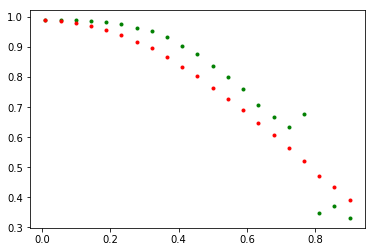

In [5]:
plt.plot(alpha,processfid_final,'g.',alpha,processfid_final_nocorrection,'r.')

Plot looks pretty good until like mu=0.75 don't what's happening after that. Need to check my analytical calculations maybe.

In [18]:
si=np.array([[1,0],[0,1]])
sy=np.array([[0,-1j],[1j,0]])
sz=np.array([[1,0],[0,-1]])
sx=np.array([[0,1],[1,0]])
zero=np.array([1,0])

In [19]:
a=np.matmul(sy,zero)
b=np.matmul(a,sz)

In [20]:
b

array([0.+0.j, 0.-1.j])